# Tasca S8.01. Visualitzacions en Python

## Nivell 1

Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.

Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.


In [3]:
#instalamos las librerias necesarias: 
!pip install pymysql
!pip install matplotlib
!pip install sqlalchemy
!pip install seaborn

In [4]:
# Importamos librerias que vamos a necesitar:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker

In [5]:
# Creamos la conexión a la base de datos:

# Parámetros de conexión
username = 'root'
password = 'Erethiel00.'
hostname = 'localhost'
database = 'transactionsv2'

conexion = f'mysql+pymysql://{username}:{password}@{hostname}/{database}'
# Creamos el motor de la base de datos
engine = create_engine(conexion)

# Creamos una sesión
Session = sessionmaker(bind=engine)
session = Session()

# Para almacenar las tablas en data frames, primero necesitaremos el nombre de las tablas:
tabla_nombres= pd.read_sql('show tables',engine)
tabla_nombres


,Tables_in_transactionsv2
0,companies
1,credit_cards
2,estado_tarjetas
3,products
4,transaction_products
5,transactions
6,users


In [6]:
# Utilizamos un bucle para almacenar las tablas en data frames y crear variables globales:
for nombres in tabla_nombres['Tables_in_transactionsv2']:
    print(nombres)  # Printamos para asegurarnos que coge todas las tablas
    query= f"SELECT * FROM {nombres}"
    df= pd.read_sql(query,engine)
    globals()[f'df_{nombres}']=df
    
engine.dispose()

companies
credit_cards
estado_tarjetas
products
transaction_products
transactions
users


In [7]:
# Vamos a crear un bucle para poder mostrar la información de todas las tablas y comprobamos que todo esté bien
def print_dataframe_info(encabezado):
    # Imprimir encabezado de DataFrame
    print("****************************************************************************************************************")
    print(f"Encabezado de: df_{encabezado}")
    print(globals()[f"df_{encabezado}"].head())  # Imprimir los primeros registros del DataFrame
    print("----------------------------------------------------------")
    
    # Imprimir información detallada del DataFrame
    print(f"Información: df_{encabezado}")
    print(globals()[f"df_{encabezado}"].info())
    print("----------------------------------------------------------")
    
    # Imprimir tamaño del DataFrame
    print(f"Tamaño: df_{encabezado}")
    print(globals()[f"df_{encabezado}"].shape)
    print("----------------------------------------------------------")
    
    # Imprimir descripción estadística del DataFrame
    print(f"Descripción: df_{encabezado}")
    print(globals()[f"df_{encabezado}"].describe())
    print("----------------------------------------------------------")

for encabezado in tabla_nombres['Tables_in_transactionsv2']:
    if f"df_{encabezado}" in globals():
        print_dataframe_info(encabezado)
    else:
        print(f"El DataFrame df_{encabezado} no está cargado correctamente en el espacio global.\n")

****************************************************************************************************************
Encabezado de: df_companies
  company_id                 company_name           phone  \
0     b-2222    Ac Fermentum Incorporated  06 85 56 52 33   
1     b-2226     Magna A Neque Industries  04 14 44 64 62   
2     b-2230                  Fusce Corp.  08 14 97 58 85   
3     b-2234    Convallis In Incorporated  06 66 57 29 50   
4     b-2238  Ante Iaculis Nec Foundation  08 23 04 99 53   

                              email        country  \
0  donec.porttitor.tellus@yahoo.net        Germany   
1       risus.donec.nibh@icloud.org      Australia   
2              risus@protonmail.edu  United States   
3                mauris.ut@aol.couk        Germany   
4       sed.dictum.proin@outlook.ca    New Zealand   

                            website  
0      https://instagram.com/site\r  
1    https://whatsapp.com/group/9\r  
2  https://pinterest.com/sub/cars\r  
3        https:

In [8]:
# Este análisis exploratorio nos permite detectar algunos errores, por ejemplo, tenemos que cambiar el declined a boolean
#birth date lo podriamos cambiar a fecha para después calcular la edad, etc.

df_transactions['declined']= df_transactions['declined'].astype(bool)

df_users['birth_date'] = pd.to_datetime(df_users['birth_date'])


### Exercici 1
Una variable numèrica.

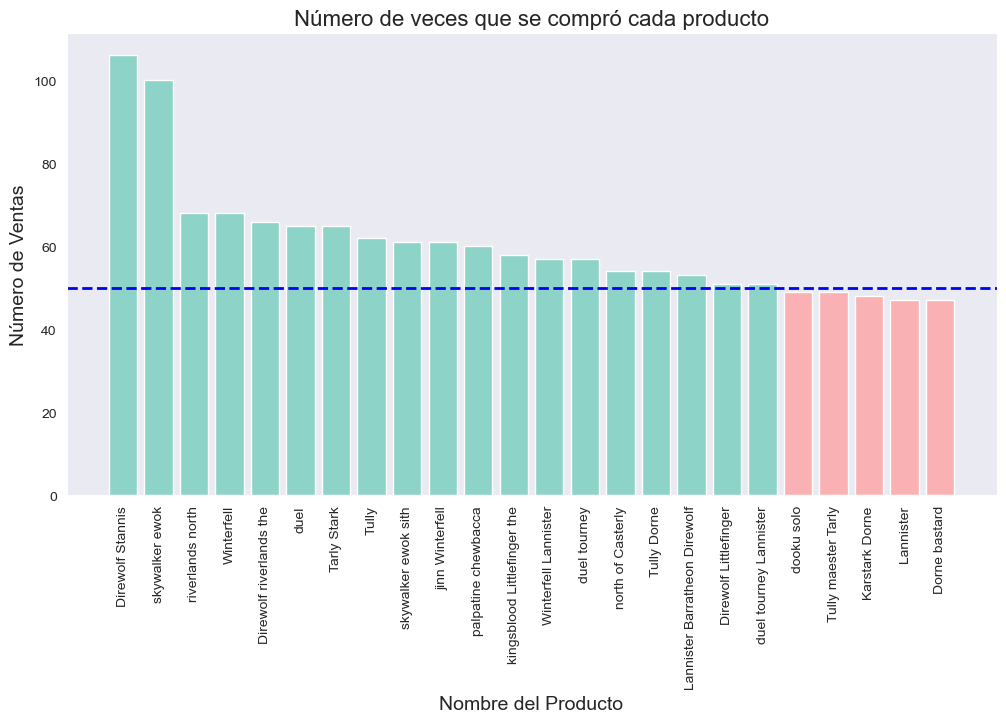

In [39]:
# Quiero graficar el numero de veces que se vendió cada producto. Para eso tenemos que unir las tablas:

df_merged_products_ids = pd.merge(df_transaction_products, df_products, left_on='product_id',right_on='id')
product_counts = df_merged_products_ids['product_name'].value_counts().reset_index()
product_counts.columns = ['product_name', 'num_ventas'] #cambiamos el nombre a las columnas


# Configurar el estilo del gráfico
plt.figure(figsize=(12, 6))
# Colores de las barras basados en el número de ventas
colors = ['#F9B1B3' if x < 50 else '#8DD3C7' for x in product_counts['num_ventas']]

plt.bar(product_counts['product_name'], product_counts['num_ventas'], color = colors)

plt.axhline(y=50, color='blue', linestyle='--', linewidth=2, label='Mínimo de 50 ventas')

# Añadir títulos y etiquetas
plt.title('Número de veces que se compró cada producto', fontsize=16)
plt.xlabel('Nombre del Producto', fontsize=14)
plt.ylabel('Número de Ventas', fontsize=14)

# Rotamos las etiquetas del eje x para que no se solapen
plt.xticks(rotation=90)


plt.show();

En este gráfico de barras podemos observar la cantidad de veces que se vendió cada producto y podemos detectar que hay 5 productos de los cuales se vendieron menos de 50 unidades: dooku solo, Tully maester Tarly, Larstark Dorne, Lannister, Dorne bastard.

### Exercici 2
Dues variables numèriques.

He decidido graficar la relación entre el peso y el precio de los productos

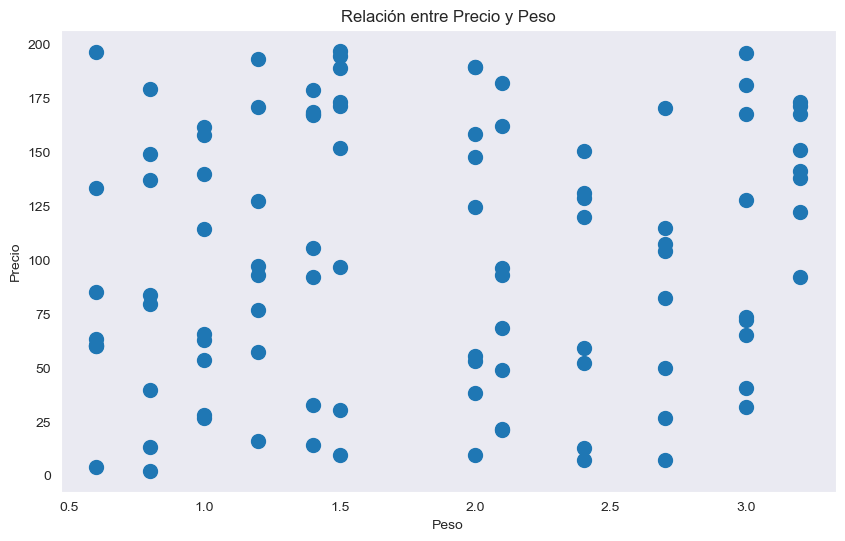

In [37]:

# Obtenemos los datos de los campos 'precio'y 'peso' de la tabla 'products'
precio = df_products['price_usd']
peso = df_products['weight']

# Creamos un DataFrame temporal con los datos
data = pd.DataFrame({'precio': precio, 'peso': peso})

# Ordenamos los datos por 'peso' y luego por 'precio'
data = data.sort_values(by=['peso', 'precio'])

# Creamos el gráfico de dispersión
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['peso'], data['precio'], s=100)

plt.xlabel('Peso')       
plt.ylabel('Precio')     
plt.title('Relación entre Precio y Peso')


# Mostramos el gráfico
plt.show();

Podemos ver en este gráfico que no hay una relación clara entre los pesos y los precios de los productos.

### Exercici 3
Una variable categòrica.

He decidido graficar la distribución de los usuarios por país.

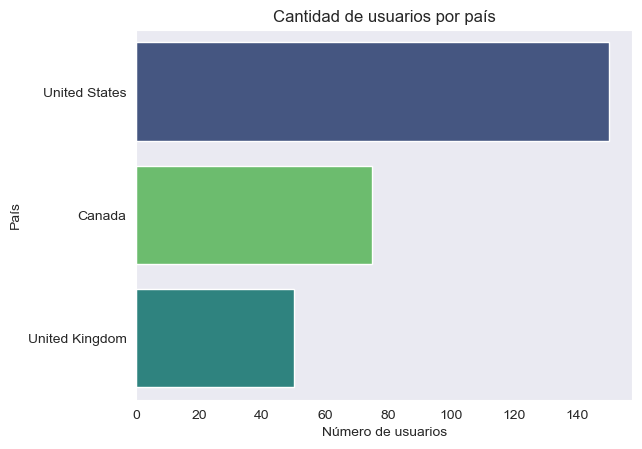

In [54]:
#Creamos un countplot de la cantidad de ususarios por país
sns.countplot(data=df_users, order=df_users['country'].value_counts().index, y='country', hue='country', palette='viridis', legend=False)

plt.title('Cantidad de usuarios por país')
plt.xlabel('Número de usuarios')
plt.ylabel('País')
plt.show();


### Exercici 4
Una variable categòrica i una numèrica.

Vamos a graficar el amount por país de procedencia de los users

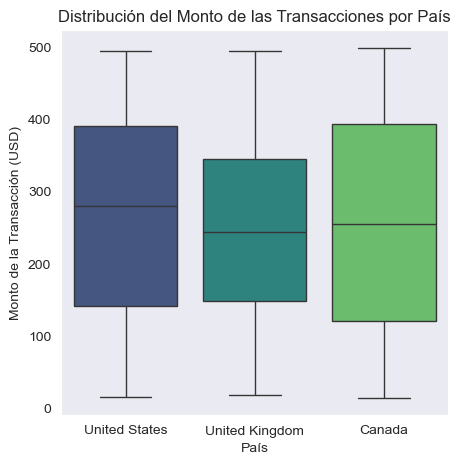

In [24]:
#Primero unimos las tablas para poder coger los datos
merge_transactions_users= pd.merge(df_transactions , df_users,left_on='user_id',right_on='id')

#Creamos el boxplot del amount por país de los ususarios:
plt.figure(figsize=(5, 5))
sns.boxplot(x='country', y='amount', data=merge_transactions_users, hue='country', palette='viridis')
plt.title('Distribución del Monto de las Transacciones por País')
plt.xlabel('País')
plt.ylabel('Monto de la Transacción (USD)')


plt.show();

Podemos observar que United States presenta una mediana u poco más alta del amount. Podemos ver que el rango intercuartílico de United Kindom es un poco menor a los otros dos, de todos modos, los rangos son muy parecidos entre todos los Países.

### Exercici 5
Dues variables categòriques.

Vamos a mostrar las transacciones declinadas por país

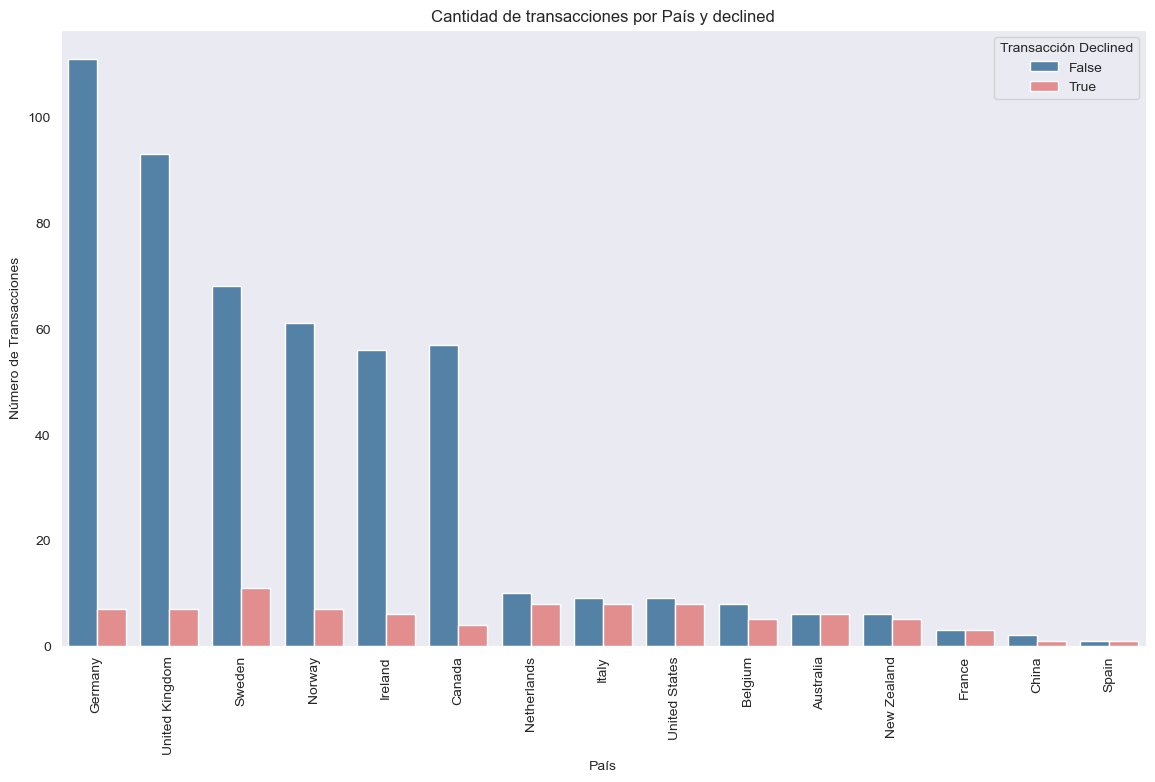

In [66]:
#Unimos las tablas para poder usar los datos:
merge_transactions_companies= pd.merge(df_transactions, df_companies, left_on='business_id', right_on= 'company_id')

# Creamos  la gráfica coutplot con el estado de 'declined' en el hue
plt.figure(figsize=(14, 8))
sns.countplot(data=merge_transactions_companies, x='country', hue='declined',order=merge_transactions_companies['country'].value_counts().index, palette={True: 'lightcoral', False: 'steelblue'})

plt.title('Cantidad de transacciones por País y declined')
plt.xlabel('País')
plt.ylabel('Número de Transacciones')
plt.xticks(rotation=90)
plt.legend(title='Transacción Declined', loc='upper right')

plt.show();

En este gráfico podemos observar que Suecia tiene el mayor número de transacciones rechazadas, seguida por Alemania y Reino Unido.
Germany, United Kingdom, Sweeden, Norway, Irland y Canadá tienen un número relativamente bajo de transacciones rechazadas en comparación con las transacciones aprobadas. En cambio, el resto de países tienen un número de transacciones declinadas muy parecido al nombre de transacciones aprobadas.

### Exercici 6
Tres variables.

Vamos a mostrar el amount a través del tiempo por país de usuario

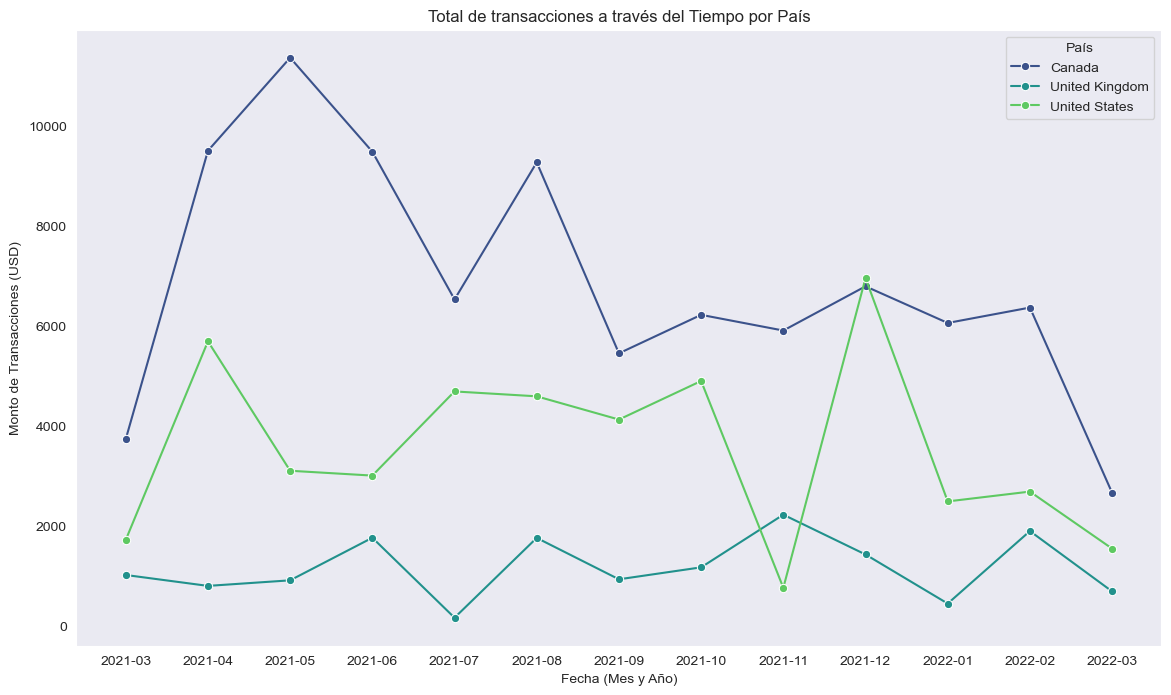

In [28]:

#Primero nos aseguramos que el timestamp está bien configurado.
df_transactions['timestamp'] = pd.to_datetime(df_transactions['timestamp'])
# Agregamos una nueva columna para el mes y año
df_transactions['month_year'] = df_transactions['timestamp'].dt.to_period('M').astype(str)

#Unimos las tablas
merge_transactions_users= pd.merge(df_transactions, df_users, left_on='user_id', right_on='id')

# Agrupamos los datos por mes y país, calculando el monto total de transacciones por mes
grouped_data = merge_transactions_users.groupby(['month_year', 'country'])['amount'].sum().reset_index()


plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped_data, x='month_year', y='amount', hue='country', marker='o',palette='viridis')

plt.title('Total de transacciones a través del Tiempo por País')
plt.xlabel('Fecha (Mes y Año)')
plt.ylabel('Monto de Transacciones (USD)')
plt.legend(title='País', loc='upper right')

plt.show();

Podemos Observar la distribució del monto de las transacciones que efectuaron los usuarios desde sus respectivos países. Se puede ver como el monto de las transacciones de los ususarios de Canada és superior a la de United Kingdom y United States a través del tiempo.

### Exercici 7

Graficar un Pairplot.

Vamos a graficar el amount de las transaciones frente el peso y el precio de los productos

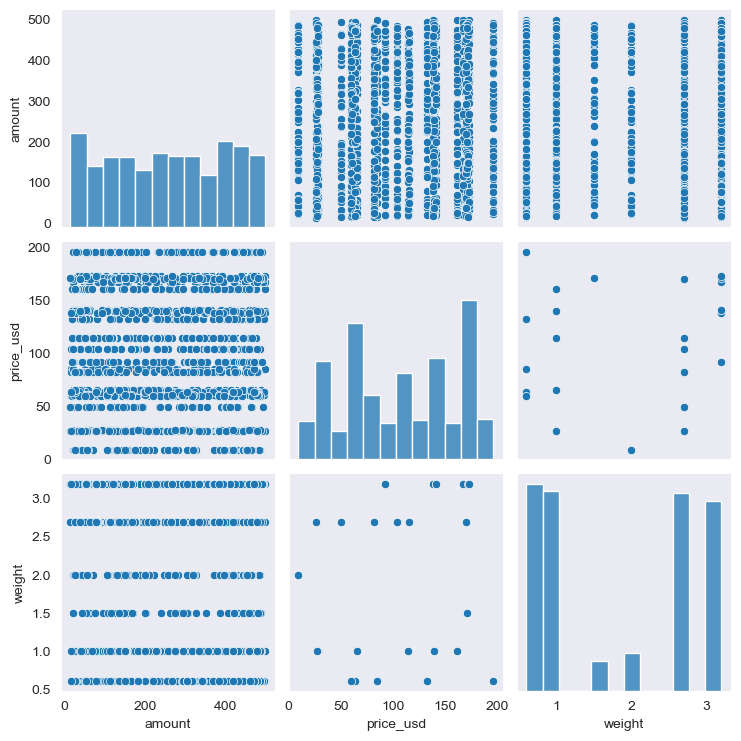

In [30]:
# Fusionar los DataFrames, ya lo hemos hecho anteriormente por eso lo dejo comentado:
#merge_transactions_companies = pd.merge(df_transactions, df_companies, left_on='business_id', right_on='company_id')

# Crear un pairplot para 'amount' y 'country'
df_merged_products_ids = pd.merge(df_transaction_products, df_products, left_on='product_id',right_on='id')
merged_transactions_products= pd.merge(left=df_transactions, right=df_merged_products_ids, left_on='id', right_on='transaction_id')
sns.pairplot(data=merged_transactions_products, vars=['amount','price_usd','weight'])



plt.show();

In [ ]:
No podemos observar mucha relación entre las variables, como mucho podriamos decir que claramente hay dos tipos de peso distintos.